## Waffle Charts

* Waffle chart is a type of Data Visualization tool that represents the data using a grid of small squares or rectangles, which are often coloured or shaded to indicate different values

* Each square or rectangle grid represents a certain portion or fraction of the entire data set 

* Waffle charts are very useful when we want to visualize fraction of the different categories within a whole

### Download and Preprocess Data

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
# read the data into pandas data frame 
df = pd.read_csv("modified_data.csv")

In [5]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info


<bound method DataFrame.info of             Type    Coverage          OdName   AREA AreaName     REG  \
0     Immigrants  Foreigners     Afghanistan  935.0     Asia  5501.0   
1     Immigrants  Foreigners         Albania  908.0   Europe   925.0   
2     Immigrants  Foreigners         Algeria  903.0   Africa   912.0   
3     Immigrants  Foreigners  American Samoa  909.0  Oceania   957.0   
4     Immigrants  Foreigners         Andorra  908.0   Europe   925.0   
...          ...         ...             ...    ...      ...     ...   
1009         NaN         NaN             NaN    NaN      NaN     NaN   
1010         NaN         NaN             NaN    NaN      NaN     NaN   
1011         NaN         NaN             NaN    NaN      NaN     NaN   
1012         NaN         NaN             NaN    NaN      NaN     NaN   
1013         NaN         NaN             NaN    NaN      NaN     NaN   

              RegName    DEV             DevName  1980  ...    2004    2005  \
0       Southern Asia  9

In [8]:
# drop duplicate values 
df.drop_duplicates()

# drop all rows containig NaN values 
df.dropna(inplace=True)

#Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

#Rename some of the columns so that they make sense.
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)


In [9]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
df.tail()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191,Western Sahara,Africa,Northern Africa,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,Yemen,Asia,Western Asia,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,...,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0
193,Zambia,Africa,Eastern Africa,Developing regions,11.0,17.0,11.0,7.0,16.0,9.0,...,56.0,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72.0,114.0,102.0,44.0,32.0,29.0,...,1450.0,615.0,454.0,663.0,611.0,508.0,494.0,434.0,437.0,407.0
195,Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,...,3739.0,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0


In [11]:
# let us add a column "Total"
# identify the integers column and make a list of them 
float_columns = df.select_dtypes(include='float64').columns

float_columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [12]:
 df['Total']= df[float_columns].sum(axis=1)

In [13]:
df["Total"]

0       58639.0
1       15699.0
2       69439.0
3           6.0
4          15.0
         ...   
191         2.0
192      2985.0
193      1677.0
194      8598.0
195    515059.0
Name: Total, Length: 196, dtype: float64

In [14]:
# let us see "Total" column added to the dataFrame or not  
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [15]:
# make country column as index 
df.set_index('Country', inplace = True)


In [16]:
# let us see whether the "Country columns" has been set as index column or Not 
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [17]:
# let us create the new dataFrame for the three Countries 'Denmark', 'Norway', 'Sweden'
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272.0,293.0,299.0,106.0,93.0,73.0,93.0,...,62.0,101.0,97.0,108.0,81.0,92.0,93.0,94.0,81.0,3901.0
Norway,Europe,Northern Europe,Developed regions,116.0,77.0,106.0,51.0,31.0,54.0,56.0,...,57.0,53.0,73.0,66.0,75.0,46.0,49.0,53.0,59.0,2327.0
Sweden,Europe,Northern Europe,Developed regions,281.0,308.0,222.0,176.0,128.0,158.0,187.0,...,205.0,139.0,193.0,165.0,167.0,159.0,134.0,140.0,140.0,5866.0


### Step 1: The first step in creating the `Woffle chart` is to determine the proportions of the each category with respect to the Total.


* let us calculate How many number of immigrants immigrated from the countries `'Denmark'`, `'Norway'`, `'Sweden'` to the `Canada` over the year `1980-2013`

In [18]:
# The number of immigrants immigrated from the countries `'Denmark'`, `'Norway'`, `'Sweden'` 
# to the `Canada` over the year `1980-2013`

total_values = df_dns['Total'].sum()
total_values

12094.0

* What Proportion of immigrants immigrated from `'Denmark'` ?
* What Proportion of immigrants immigrated from `'Norway'`?
* What Proportion of immigrants immigrated from `'Sweden'`?

In [19]:
# compute the proportion of each category with respect to the total
category_proportions = (df_dns["Total"] / total_values)

type(category_proportions)

pandas.core.series.Series

In [20]:
# make dataFrame of the proportion of each category with respect to the total

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


### Step 2: Definig the size of the `Woffle Chart`

In [21]:
width = 40      # Width of the chart 
hight = 10      # Hight of the chart

total_num_tiles = width * hight     # Total number of tiles 
 
total_num_tiles

400

### Step 3: Caculating Number of tiles required for each category based on their category_proportion 

In [22]:
# Calculate the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)
tiles_per_category

Country
Denmark    129
Norway      77
Sweden     194
Name: Total, dtype: int32

In [23]:
# let us make a dataFrame with the tiles_per_category
pd.DataFrame({"tiles per category": tiles_per_category})

,tiles per category
Country,
Denmark,129
Norway,77
Sweden,194


In [24]:
sum(tiles_per_category[0:1])

129

### Step 4: Creating the empty 2D matrix that resembles the `woffle chafrt`

For creating the 2D matrix that resembles the `woffle chart`, we will use a `np.zeroes()` function from the Numpy library that creates an array filled with Zeroes. if we want to create 2D matrix then pass a tuple ( m, n ) containig the dimenstion of the matrix as an argument o the function `np.zeroes()`

In [25]:
# Initiate the woffle chart by creating the empty matrix 
waffle_chart = np.zeros((hight,width), dtype = np.uint)

In [26]:
# print empty matrix 
waffle_chart

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [27]:
# define indices to loop through waffle chart 
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(hight):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

In [28]:
# Print the waffle chart populated
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

As expected , The matrix consist of three categories and the total number of each categories instances matched with the tiles allocated to the each categories


### Step 5: Plot an Image of waffle chart using 2D matrix

We can plot an Image from the 2D matrix by using various Python libraries like `matplotlib` and `PIL`( Python Imaging Library )

* `plt.imshow(2D_matrix, cmap='gray')` function from the `matplotlib` library will be used 
* `(Image.fromarray(image_matrix)).show()` function from the `PIL` library will be used 
* `plt.matshow(waffle_chart, cmap=colormap)` function from the `matplotlib` library will also be used

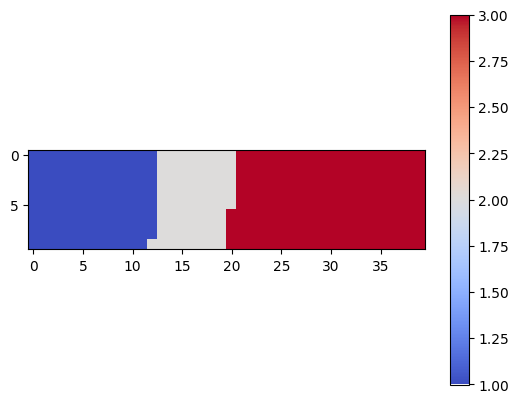

In [29]:
# ploting waffle chart using the matplotlib
# Instantiate a new figure 

colormap = plt.cm.coolwarm
plt.imshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

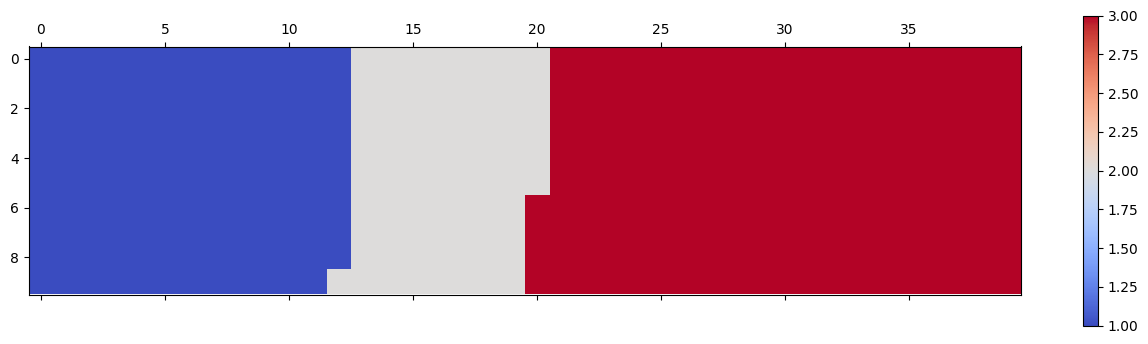

In [30]:

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

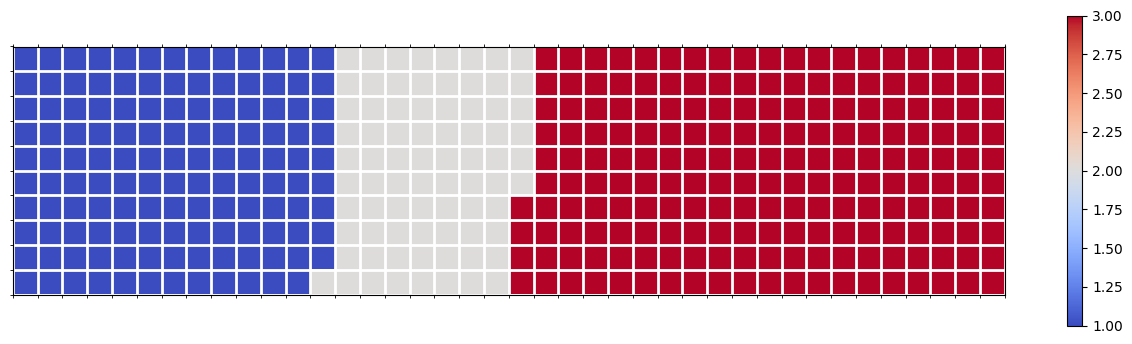

In [31]:
# let us pretify the Image 

fig = plt.figure()

plt.matshow(waffle_chart, cmap = 'coolwarm')
plt.colorbar()


# Get the current axis ( get the axis object )
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-0.5, width, 1), minor = True)
ax.set_yticks(np.arange(-.5, (hight), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# remove the x-axis ticks
plt.xticks([])

# remove the y-axis ticks 
plt.yticks([])

plt.show()



In [39]:
import matplotlib.patches as mpatches


In [40]:
def create_waffle_chart(categories, values, hight, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * hight # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dns.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((hight, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(hight):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (hight), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [41]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dns.index.values # categories
values = df_dns['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

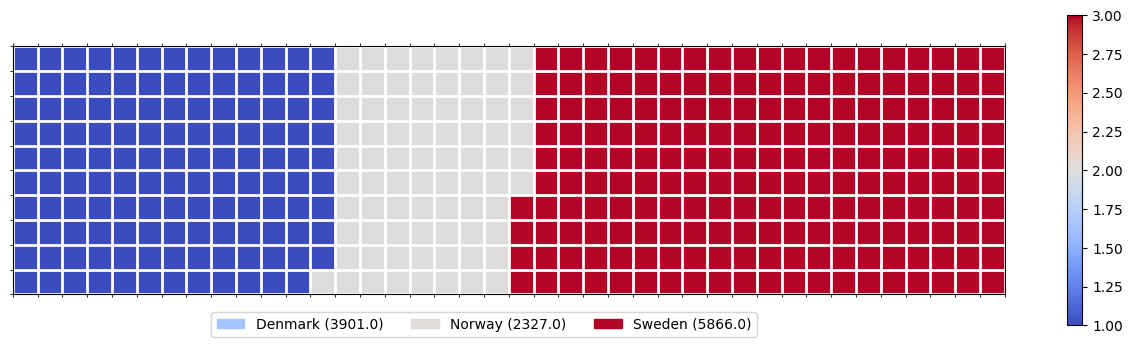

In [42]:
create_waffle_chart(categories, values, hight, width, colormap)